# Example3 - Multisetup with Post Separate Estimation Re-scaling (PoSER) method

In this example, we'll be working with a simulated dataset generated from a finite element model of a fictitious three-story, L-shaped building. This model was created using OpenSeesPy, and the corresponding Python script can be found [here](https://github.com/dagghe/pyOMA-test-data/blob/main/test_data/3SL/model.py). 

As always, first we import the necessary modules. All the files needed to run this example are available [here](https://github.com/dagghe/pyOMA-test-data/tree/main/test_data/3SL).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pyoma2.algorithms import SSI
from pyoma2.setup import MultiSetup_PoSER, SingleSetup
from pyoma2.support.utils.sample_data import get_sample_data

For the **PoSER** approach, after importing the necessary modules and loading the data, the next step is to create a separate instance of the single setup class for each available dataset.

The exact natural frequencies of the system are: 2.63186, 2.69173, 3.43042, 8.29742, 8.42882, 10.6272, 14.0053, 14.093, 17.5741

In [2]:
# import data files
set1 = np.load(get_sample_data(filename="set1.npy", folder="3SL"), allow_pickle=True)
set2 = np.load(get_sample_data(filename="set2.npy", folder="3SL"), allow_pickle=True)
set3 = np.load(get_sample_data(filename="set3.npy", folder="3SL"), allow_pickle=True)

# create single setup
ss1 = SingleSetup(set1, fs=100)
ss2 = SingleSetup(set2, fs=100)
ss3 = SingleSetup(set3, fs=100)

# Detrend and decimate
ss1.decimate_data(q=2)
ss2.decimate_data(q=2)
ss3.decimate_data(q=2)

2025-06-07 22:45:32,706 - pyoma2.support.utils.sample_data - INFO - set1.npy already exists locally. (sample_data:49)
2025-06-07 22:45:32,709 - pyoma2.support.utils.sample_data - INFO - set2.npy already exists locally. (sample_data:49)
2025-06-07 22:45:32,711 - pyoma2.support.utils.sample_data - INFO - set3.npy already exists locally. (sample_data:49)


The process for obtaining the modal properties from each setup remains the same as described in the example for the single setup. 

2025-06-07 22:45:32,820 - pyoma2.setup.base - INFO - Running SSIcov_s1... (base:123)
2025-06-07 22:45:32,820 - pyoma2.functions.ssi - INFO - Assembling Hankel matrix method: cov... (ssi:89)
2025-06-07 22:45:33,058 - pyoma2.functions.ssi - INFO - SSI for increasing model order... (ssi:462)
100%|██████████| 41/41 [00:00<00:00, 16277.00it/s]
2025-06-07 22:45:33,078 - pyoma2.functions.ssi - INFO - Calculating modal parameters for increasing model order... (ssi:628)
100%|██████████| 41/41 [00:00<00:00, 1177.89it/s]
2025-06-07 22:45:33,214 - pyoma2.setup.base - INFO - all done (base:102)
2025-06-07 22:45:33,214 - pyoma2.setup.base - INFO - Running SSIcov_s2... (base:123)
2025-06-07 22:45:33,214 - pyoma2.functions.ssi - INFO - Assembling Hankel matrix method: cov... (ssi:89)
2025-06-07 22:45:33,296 - pyoma2.functions.ssi - INFO - SSI for increasing model order... (ssi:462)
100%|██████████| 41/41 [00:00<00:00, 19523.89it/s]
2025-06-07 22:45:33,300 - pyoma2.functions.ssi - INFO - Calculating mo

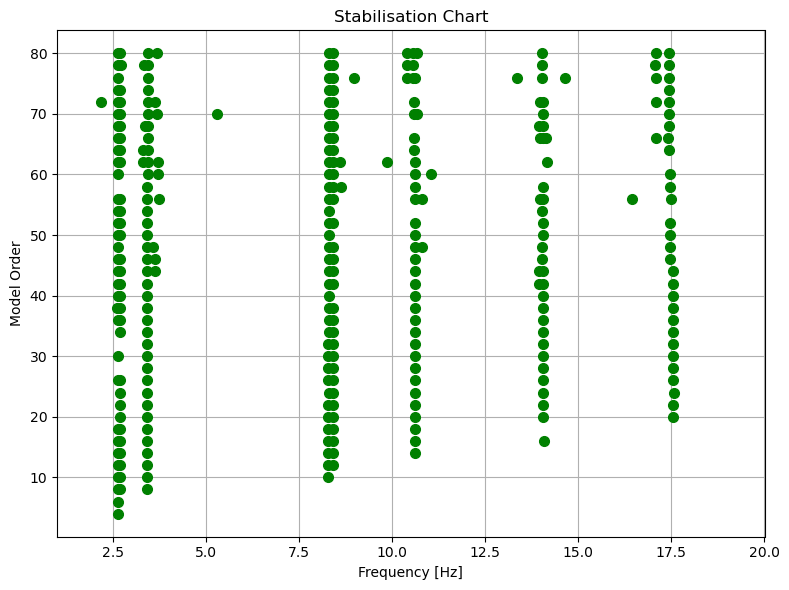

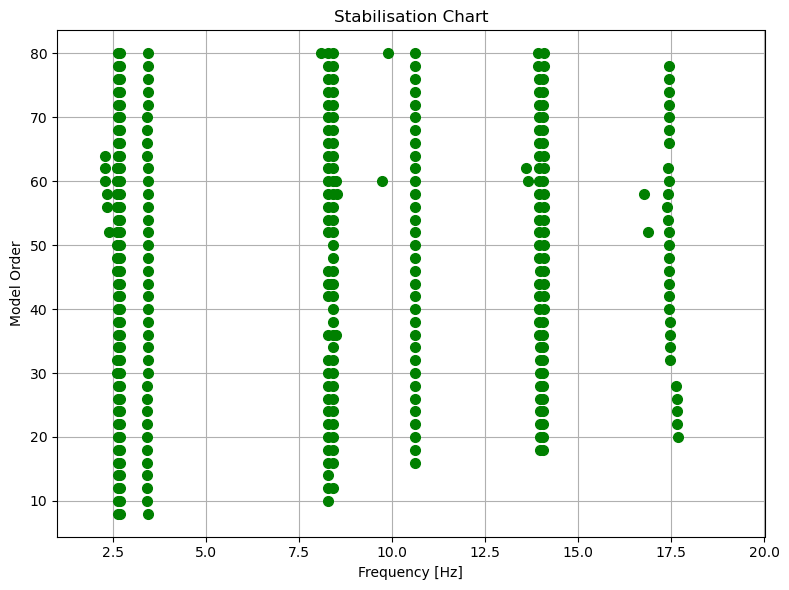

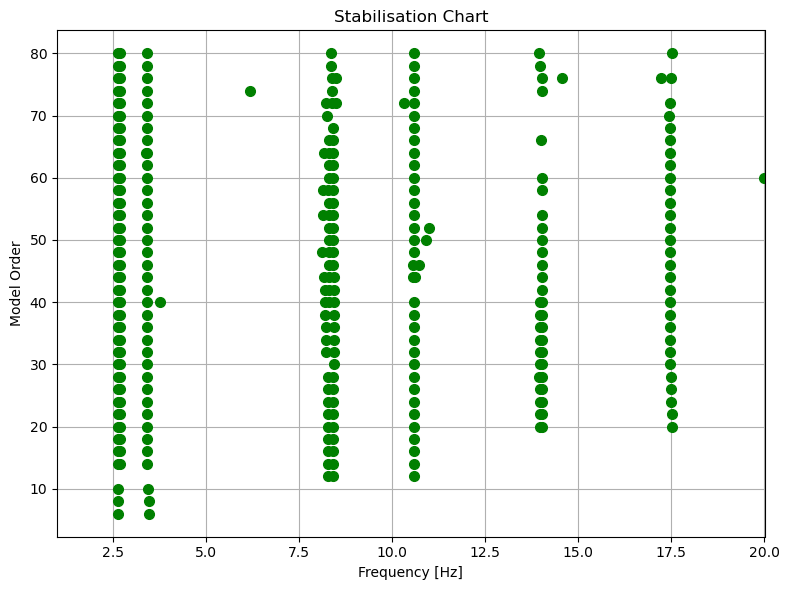

In [3]:
# Initialise the algorithms for setup 1
ssicov1 = SSI(name="SSIcov_s1", method="cov", br=45, ordmax=80, step=2)
# Add algorithms to the class
ss1.add_algorithms(ssicov1)
ss1.run_all()

# Initialise the algorithms for setup 2
ssicov2 = SSI(name="SSIcov_s2", method="cov", br=30, ordmax=80, step=2)
ss2.add_algorithms(ssicov2)
ss2.run_all()

# Initialise the algorithms for setup 3
ssicov3 = SSI(name="SSIcov_s3", method="cov", br=30, ordmax=80, step=2)
ss3.add_algorithms(ssicov3)
ss3.run_all()

# Plot stabilisation chart
_, _ = ssicov1.plot_stab(freqlim=(1,20))
_, _ = ssicov2.plot_stab(freqlim=(1,20))
_, _ = ssicov3.plot_stab(freqlim=(1,20))


In [4]:
# Extract results 
ss1.mpe(
    "SSIcov_s1",
    sel_freq=[2.63, 2.69, 3.43, 8.29, 8.42, 10.62, 14.00, 14.09, 17.57],
    order_in=42)
ss2.mpe(
    "SSIcov_s2",
    sel_freq=[2.63, 2.69, 3.43, 8.29, 8.42, 10.62, 14.00, 14.09, 17.57],
    order_in=40)
ss3.mpe(
    "SSIcov_s3",
    sel_freq=[2.63, 2.69, 3.43, 8.29, 8.42, 10.62, 14.00, 14.09, 17.57],
    order_in=40)

2025-06-07 22:45:33,838 - pyoma2.setup.base - INFO - Getting mpe modal parameters from SSIcov_s1 (base:149)
2025-06-07 22:45:33,839 - pyoma2.functions.ssi - INFO - Extracting SSI modal parameters (ssi:1036)
100%|██████████| 9/9 [00:00<00:00, 26232.62it/s]
2025-06-07 22:45:33,841 - pyoma2.setup.base - INFO - Getting mpe modal parameters from SSIcov_s2 (base:149)
2025-06-07 22:45:33,841 - pyoma2.functions.ssi - INFO - Extracting SSI modal parameters (ssi:1036)
100%|██████████| 9/9 [00:00<00:00, 45700.65it/s]
2025-06-07 22:45:33,842 - pyoma2.setup.base - INFO - Getting mpe modal parameters from SSIcov_s3 (base:149)
2025-06-07 22:45:33,842 - pyoma2.functions.ssi - INFO - Extracting SSI modal parameters (ssi:1036)
100%|██████████| 9/9 [00:00<00:00, 45425.68it/s]


After analyzing all datasets, the ```MultiSetup_PoSER``` class can be instantiated by passing the processed single setup and the lists of reference indices. Subsequently, the ```merge_results()``` method is used to combine the results.

In [5]:
# reference indices
ref_ind = [[0, 1, 2], [0, 1, 2], [0, 1, 2]]
# Creating Multi setup
msp = MultiSetup_PoSER(ref_ind=ref_ind, single_setups=[ss1, ss2, ss3], names=["SSIcov"])

# Merging results from single setups
result = msp.merge_results()

# dictionary of merged results
res_ssicov = dict(result["SSIcov"])
result["SSIcov"].Fn

2025-06-07 22:45:33,866 - pyoma2.setup.multi - INFO - Merging SSI results for SSIcov group (multi:220)
2025-06-07 22:45:33,866 - pyoma2.setup.multi - INFO - Merging SSIcov_s1 results (multi:226)
2025-06-07 22:45:33,880 - pyoma2.setup.multi - INFO - Merging SSIcov_s2 results (multi:226)
2025-06-07 22:45:33,882 - pyoma2.setup.multi - INFO - Merging SSIcov_s3 results (multi:226)


array([ 2.63082822,  2.68932878,  3.42650187,  8.29485313,  8.42450315,
       10.59804071, 14.00696514, 14.04526996, 17.47934335])

Once the class has been instantiated we can define the "global" geometry on it and then plot or animate the mode shapes

In [6]:
# Geometry 1
_geo1 = get_sample_data(filename="Geo1.xlsx", folder="3SL")
# Geometry 2
_geo2 = get_sample_data(filename="Geo2.xlsx", folder="3SL")

# Define geometry1
msp.def_geo1_by_file(_geo1)

# Define geometry 2
msp.def_geo2_by_file(_geo2)

2025-06-07 22:45:33,942 - pyoma2.support.utils.sample_data - INFO - Geo1.xlsx already exists locally. (sample_data:49)
2025-06-07 22:45:33,943 - pyoma2.support.utils.sample_data - INFO - Geo2.xlsx already exists locally. (sample_data:49)


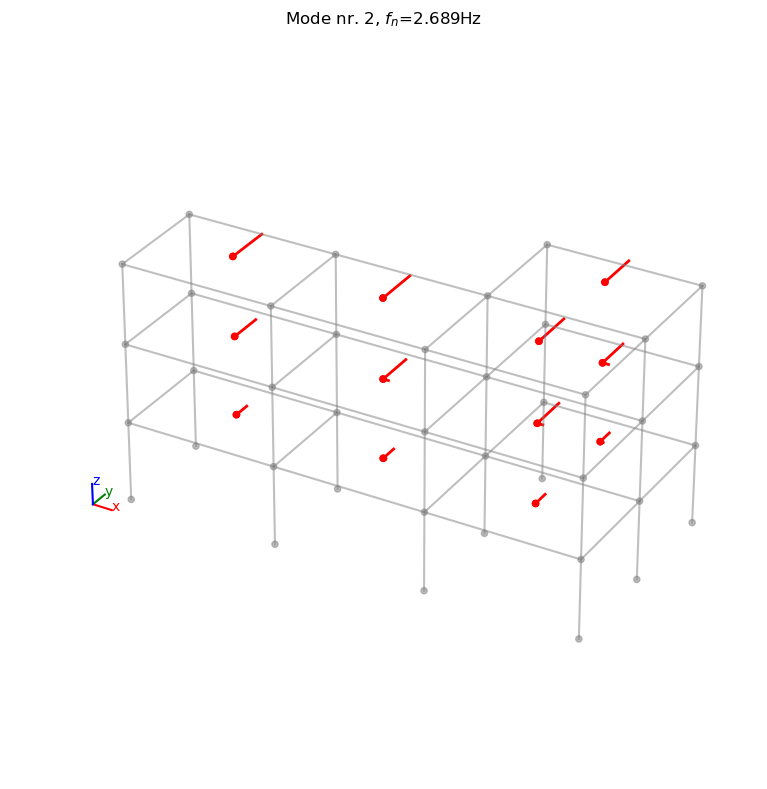

In [7]:
# define results variable
algoRes = result["SSIcov"]

# Plot mode 2 (geometry 1)
_, _ = msp.plot_mode_geo1(
      algo_res=algoRes, mode_nr=2, scaleF=2)

In [8]:
# Plot mode 1 (geometry 2, pyvista)
_ = msp.plot_mode_geo2(algo_res=algoRes, mode_nr=1, scaleF=2, notebook=True)

Widget(value='<iframe src="http://localhost:61244/index.html?ui=P_0x168eeb7a0_0&reconnect=auto" class="pyvista…

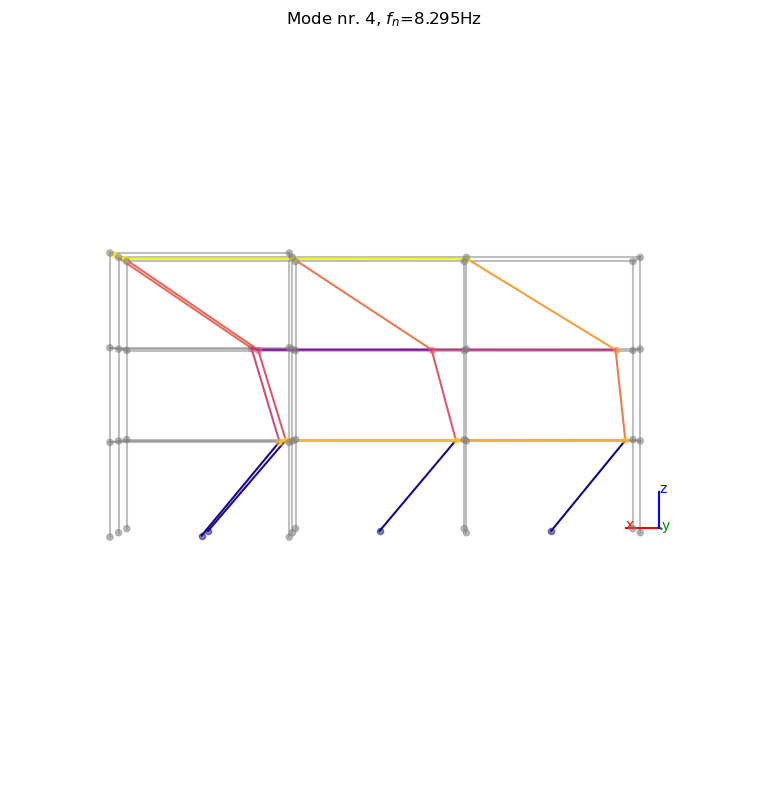

In [9]:
# Plot mode 4 (geometry 2, matplotlib)
_, _ = msp.plot_mode_geo2_mpl(
      algo_res=algoRes, mode_nr=4, view="xz", scaleF=3)

In [10]:
# Animate mode 5 (geometry 2, pyvista)
_ = msp.anim_mode_geo2(
      algo_res=algoRes, mode_nr=5, scaleF=3, notebook=True)

In [11]:
algoRes.Fn

array([ 2.63082822,  2.68932878,  3.42650187,  8.29485313,  8.42450315,
       10.59804071, 14.00696514, 14.04526996, 17.47934335])